# Random Forest - Previsão de Séries Temporais

## Importar as bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importar a base de dados

In [2]:
dataset = pd.read_csv('AirPassengers.csv', index_col=0)
dataset.head()

,#Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


In [3]:
dataset.shape

(144, 1)

## Visualizar série histórica

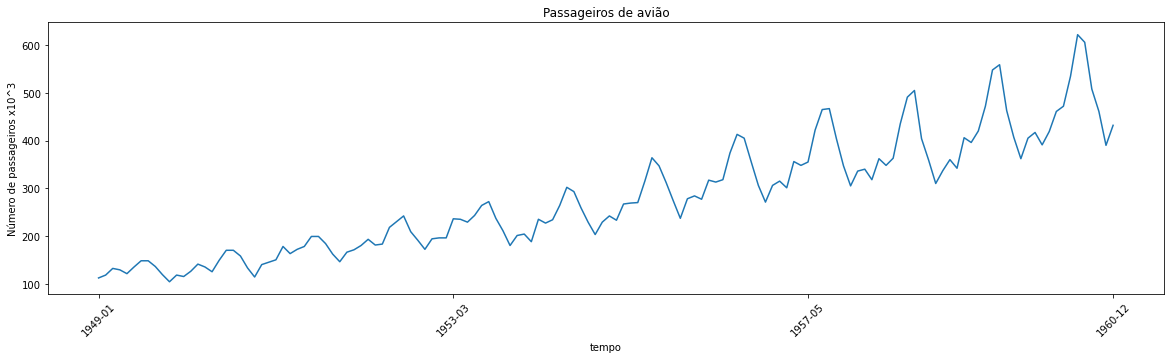

In [4]:
plt.figure(figsize=(20,5))
plt.plot(dataset)
plt.xlabel("tempo")
plt.ylabel("Número de passageiros x10^3")
plt.title("Passageiros de avião")
plt.xticks([0,50,100,143], rotation=45) # coloca somente 4 valores no eixo x e rotaciona 45 graus por questões de visualização
plt.show()

## Criar janelamento

In [5]:
window = 12
dataSize = len(dataset)
X = []
y = []
for i in range(window, dataSize):
    X.append(dataset.iloc[i-window:i, 0])
    y.append(dataset.iloc[i, 0])
X, y = np.array(X), np.array(y)

In [6]:
print(X.shape)
print(y.shape)

(132, 12)
(132,)


In [7]:
X[0:5]

array([[112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118],
       [118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118, 115],
       [132, 129, 121, 135, 148, 148, 136, 119, 104, 118, 115, 126],
       [129, 121, 135, 148, 148, 136, 119, 104, 118, 115, 126, 141],
       [121, 135, 148, 148, 136, 119, 104, 118, 115, 126, 141, 135]])

In [8]:
y[0:5]

array([115, 126, 141, 135, 125])

## Separar em treino e teste

In [9]:
import random
np.random.seed(0) #semente inicial (reprodução de resultados)

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# imprimir
x_train[0:5]

array([[227, 234, 264, 302, 293, 259, 229, 203, 229, 242, 233, 267],
       [229, 242, 233, 267, 269, 270, 315, 364, 347, 312, 274, 237],
       [317, 313, 318, 374, 413, 405, 355, 306, 271, 306, 315, 301],
       [162, 146, 166, 171, 180, 193, 181, 183, 218, 230, 242, 209],
       [407, 362, 405, 417, 391, 419, 461, 472, 535, 622, 606, 508]])

## Random Forest

In [11]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state=0)
regressor.fit(x_train, y_train);

## Utilizar modelo treinado para fazer previsões na base de teste (um passo à frente)

In [12]:
y_pred = regressor.predict(x_test)
y_pred[0:5]

array([334.7, 328.3, 195.5, 153.8, 225.1])

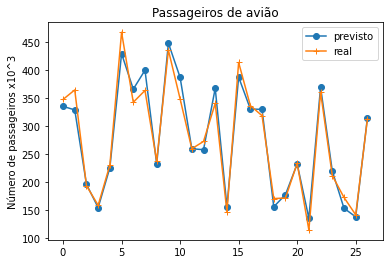

In [13]:
plt.plot(y_pred, label='previsto', marker='o')
plt.plot(y_test, label='real', marker='+')
plt.ylabel("Número de passageiros x10^3")
plt.title("Passageiros de avião")
plt.legend()
plt.show()

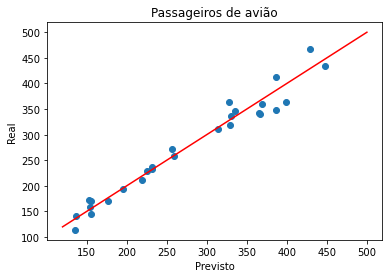

In [14]:
plt.scatter(y_pred,y_test)
plt.ylabel("Real")
plt.xlabel("Previsto")
plt.title("Passageiros de avião")

x = [120.0, 500.0]
plt.plot(x, x, color='red'); #reta onde y=x

plt.show()

## Calcular métricas de erro

In [15]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(y_pred,y_test))
print('RMSE: ', rmse)

RMSE:  18.82374387132733


In [16]:
mse = mean_squared_error(y_pred,y_test)
print('MSE: ',mse)

MSE:  354.3333333333332


In [17]:
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('MAPE: ',mape, '%')

MAPE:  5.339182102443071 %


In [18]:
from sklearn.metrics import r2_score
r2_score(y_pred,y_test)

0.9625906614795504

## Prever mais passos à frente

OBS: tenha em conta que o modelo é 'one step ahead'. Ao prever mais passos à frente utilizando a própria previsão, estaremos propagando cada vez mais erro!

### Exercício 1: Utilize o modelo treinado para fazer a previsão de 1 passo à frente

In [19]:
lag = dataset.iloc[dataSize-window:dataSize,0].values
lag[0:window]

array([417, 391, 419, 461, 472, 535, 622, 606, 508, 461, 390, 432])

In [20]:
dataset.tail(window)

,#Passengers
Month,
1960-01,417
1960-02,391
1960-03,419
1960-04,461
1960-05,472
1960-06,535
1960-07,622
1960-08,606
1960-09,508


In [21]:
lag = lag.reshape(1, -1)
print(lag.shape)
lag

(1, 12)


array([[417, 391, 419, 461, 472, 535, 622, 606, 508, 461, 390, 432]])

In [22]:
regressor.predict(lag)

array([458.6])

### Exercício 2: Utilize o modelo treinado para fazer a previsão de 12 passos à frente

In [23]:
timesteps_to_predict = 12
lag = dataset.iloc[dataSize-window:dataSize,0].values
lag = lag.reshape(1, -1)

predictions=[]
for i in range(timesteps_to_predict):
  prediction = regressor.predict(lag)
  predictions.append(prediction)

  lag = lag[0, 1:window]  
  lag = np.append(lag, prediction[0])
  lag = lag.reshape(1, -1)

In [24]:
predictions

[array([458.6]),
 array([438.9]),
 array([470.9]),
 array([553.4]),
 array([582.4]),
 array([592.4]),
 array([612.4]),
 array([592.3]),
 array([592.3]),
 array([555.2]),
 array([438.8]),
 array([470.9])]

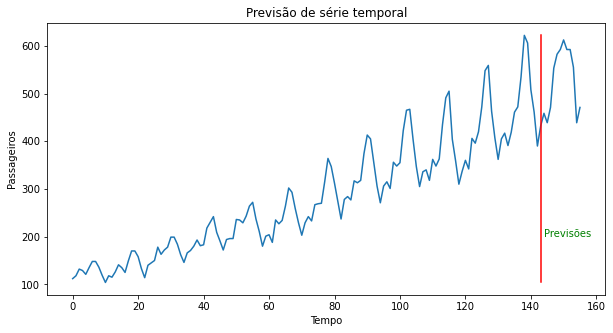

In [25]:
all_data = np.vstack((dataset, predictions))
plt.figure(figsize=(10,5))
plt.plot(all_data)
plt.title('Previsão de série temporal')
plt.xlabel('Tempo')
plt.ylabel('Passageiros')

# marca o início das previsões
x = [len(dataset)-1, len(dataset)-1]
y = [dataset['#Passengers'].min(), dataset['#Passengers'].max()]
plt.plot(x, y, color='red')
plt.annotate("Previsões", (144, 200), color='green')

#salva o gráfico
plt.savefig('predictions_training_test.svg')
plt.show()